In [1]:
import numpy as np
import pickle
import tensorflow as tf
import math
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import pad_sequences
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


(10, 2)


((40000,), (40000,))
((5328, 10, 1), (5328, 1))


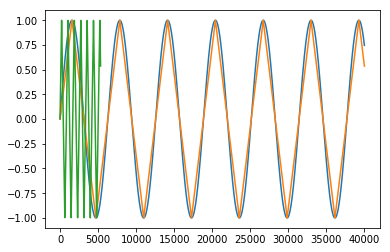

In [3]:
tpi = 2/np.pi

def triangle_wave(x):
    y=[]
    for i in x:
        if(i%(2*np.pi)<np.pi/2):
            y.append((i%np.pi)*tpi)
        elif(i%(2*np.pi)<np.pi):
            y.append((np.pi-(i%np.pi))*tpi)
        elif(i%(2*np.pi)<1.5*np.pi):
            y.append((np.pi-(i%(2*np.pi)))*tpi)
        else:
            y.append(((i%(2*np.pi))-2*np.pi)*tpi)
    return y
X=np.arange(0,40,0.001)
sin_wave = np.array([math.sin(x) for x in np.arange(0,40,0.001)])
tri_wave = np.array(triangle_wave(X))
print(sin_wave.shape, tri_wave.shape)
x=[]
y=[]
i=0
MAX_SEQ_LEN = 10
while(i<len(tri_wave)-MAX_SEQ_LEN):
    seq_len = np.random.randint(MAX_SEQ_LEN-5,MAX_SEQ_LEN+1)
    x.append(tri_wave[i:i+seq_len])
    y.append(tri_wave[i+seq_len])
    i+=seq_len

while(i<len(tri_wave)-MAX_SEQ_LEN):
    seq_len = np.random.randint(MAX_SEQ_LEN-5,MAX_SEQ_LEN+1)
    x.append(sin_wave[i:i+seq_len])
    y.append(sin_wave[i+seq_len])
    i+=seq_len
plt.plot(sin_wave)
plt.plot(tri_wave)
plt.plot(y)
padX = pad_sequences(x, maxlen=MAX_SEQ_LEN,dtype='float32')
x = np.array(padX)
x = np.expand_dims(x, axis=2)
y = np.array(y)
y = np.expand_dims(y, axis=1)
x,y = shuffle(x,y)
print(x.shape, y.shape)

In [5]:
from keras.layers import Input
from keras.models import Model
from keras.layers.core import Dense, Activation 
from keras.layers.recurrent import SimpleRNN


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
X_train, y_train = shuffle(x, y)


in_out_neurons = 1
hidden_neurons = 6
inp = Input(batch_shape=(None,MAX_SEQ_LEN,in_out_neurons))  

rnn = SimpleRNN(hidden_neurons, return_sequences=False,stateful = False,name="RNN")(inp)

dens = Dense(in_out_neurons,name="dense")(rnn)
model = Model(inputs=[inp],outputs=[dens])

model.compile(loss="mean_squared_error", optimizer="rmsprop")

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 10, 1)             0         
_________________________________________________________________
RNN (SimpleRNN)              (None, 6)                 48        
_________________________________________________________________
dense (Dense)                (None, 1)                 7         
Total params: 55
Trainable params: 55
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Use tf.cast instead.
Train on 5061 samples, validate on 267 samples
Epoch 1/400
5061/5061 [==============================] - 0s 60us/step - loss: 0.0568 - val_loss: 0.0235
Epoch 2/400
5061/5061 [==============================] - 0s 25us/step - loss: 0.0140 - val_loss: 0.0068
Epoch 3/400
5061/5061 [==============================] - 0s 24us/step - loss: 0.0035 - val_loss: 0.0015
Epoch 4/400
5061/5061 [==============================] - 0s 24us/step - loss: 7.3902e-04 - val_loss: 3.3580e-04
Epoch 5/400
5061/5061 [==============================] - 0s 25us/step - loss: 1.6464e-04 - val_loss: 9.4574e-05
Epoch 6/400
5061/5061 [==============================] - 0s 26us/step - loss: 7.6286e-05 - val_loss: 1.0671e-04
Epoch 7/400
5061/5061 [==============================] - 0s 26us/step - loss: 5.8370e-05 - val_loss: 4.4229e-05
Epoch 8/400
5061/5061 [==============================] - 0s 28us/step - loss: 5.0937e-05 - val_loss: 3.8550e-05
Epoch 9/400
5061/5061 [==========

Epoch 71/400
5061/5061 [==============================] - 0s 22us/step - loss: 1.4069e-05 - val_loss: 2.9447e-06
Epoch 72/400
5061/5061 [==============================] - 0s 23us/step - loss: 1.4968e-05 - val_loss: 8.9476e-06
Epoch 73/400
5061/5061 [==============================] - 0s 23us/step - loss: 1.3134e-05 - val_loss: 3.5554e-06
Epoch 74/400
5061/5061 [==============================] - 0s 22us/step - loss: 1.4690e-05 - val_loss: 6.1205e-05
Epoch 75/400
5061/5061 [==============================] - 0s 21us/step - loss: 1.2791e-05 - val_loss: 2.1878e-05
Epoch 76/400
5061/5061 [==============================] - 0s 23us/step - loss: 1.4222e-05 - val_loss: 8.4169e-06
Epoch 77/400
5061/5061 [==============================] - 0s 22us/step - loss: 1.4360e-05 - val_loss: 7.7806e-06
Epoch 78/400
5061/5061 [==============================] - 0s 24us/step - loss: 1.3408e-05 - val_loss: 1.3408e-05
Epoch 79/400
5061/5061 [==============================] - 0s 24us/step - loss: 1.4487e-05 - val_

5061/5061 [==============================] - 0s 23us/step - loss: 1.0454e-05 - val_loss: 2.0343e-06
Epoch 144/400
5061/5061 [==============================] - 0s 23us/step - loss: 1.0348e-05 - val_loss: 3.1153e-05
Epoch 145/400
5061/5061 [==============================] - 0s 23us/step - loss: 1.0705e-05 - val_loss: 1.8152e-05
Epoch 146/400
5061/5061 [==============================] - 0s 21us/step - loss: 9.9185e-06 - val_loss: 1.5894e-06
Epoch 147/400
5061/5061 [==============================] - 0s 23us/step - loss: 9.9522e-06 - val_loss: 9.4926e-06
Epoch 148/400
5061/5061 [==============================] - 0s 22us/step - loss: 1.1007e-05 - val_loss: 2.0199e-06
Epoch 149/400
5061/5061 [==============================] - 0s 22us/step - loss: 9.9606e-06 - val_loss: 2.1530e-05
Epoch 150/400
5061/5061 [==============================] - 0s 23us/step - loss: 9.9343e-06 - val_loss: 4.9135e-06
Epoch 151/400
5061/5061 [==============================] - 0s 23us/step - loss: 1.0047e-05 - val_loss:

Epoch 215/400
5061/5061 [==============================] - 0s 24us/step - loss: 9.1292e-06 - val_loss: 3.4805e-07
Epoch 216/400
5061/5061 [==============================] - 0s 22us/step - loss: 8.2143e-06 - val_loss: 4.4458e-05
Epoch 217/400
5061/5061 [==============================] - 0s 22us/step - loss: 8.7039e-06 - val_loss: 1.6418e-05
Epoch 218/400
5061/5061 [==============================] - 0s 22us/step - loss: 7.9970e-06 - val_loss: 2.2298e-05
Epoch 219/400
5061/5061 [==============================] - 0s 23us/step - loss: 8.8310e-06 - val_loss: 3.8057e-06
Epoch 220/400
5061/5061 [==============================] - 0s 22us/step - loss: 8.4432e-06 - val_loss: 9.6007e-06
Epoch 221/400
5061/5061 [==============================] - 0s 23us/step - loss: 8.6000e-06 - val_loss: 2.2100e-06
Epoch 222/400
5061/5061 [==============================] - 0s 23us/step - loss: 8.3587e-06 - val_loss: 1.8931e-05
Epoch 223/400
5061/5061 [==============================] - 0s 22us/step - loss: 8.7524e-

Epoch 287/400
5061/5061 [==============================] - 0s 28us/step - loss: 7.3559e-06 - val_loss: 3.5086e-06
Epoch 288/400
5061/5061 [==============================] - 0s 30us/step - loss: 8.0561e-06 - val_loss: 1.2255e-06
Epoch 289/400
5061/5061 [==============================] - 0s 31us/step - loss: 7.1164e-06 - val_loss: 6.1931e-06
Epoch 290/400
5061/5061 [==============================] - 0s 25us/step - loss: 7.9815e-06 - val_loss: 6.6350e-07
Epoch 291/400
5061/5061 [==============================] - 0s 28us/step - loss: 7.8267e-06 - val_loss: 3.3319e-07
Epoch 292/400
5061/5061 [==============================] - 0s 26us/step - loss: 7.7602e-06 - val_loss: 2.9711e-06
Epoch 293/400
5061/5061 [==============================] - 0s 28us/step - loss: 7.9075e-06 - val_loss: 1.0264e-06
Epoch 294/400
5061/5061 [==============================] - 0s 30us/step - loss: 7.0579e-06 - val_loss: 4.3154e-06
Epoch 295/400
5061/5061 [==============================] - 0s 24us/step - loss: 8.0401e-

Epoch 359/400
5061/5061 [==============================] - 0s 24us/step - loss: 7.2627e-06 - val_loss: 9.3923e-07
Epoch 360/400
5061/5061 [==============================] - 0s 21us/step - loss: 7.2247e-06 - val_loss: 7.3000e-06
Epoch 361/400
5061/5061 [==============================] - 0s 22us/step - loss: 6.8498e-06 - val_loss: 2.0349e-05
Epoch 362/400
5061/5061 [==============================] - 0s 24us/step - loss: 7.2086e-06 - val_loss: 1.1216e-05
Epoch 363/400
5061/5061 [==============================] - 0s 22us/step - loss: 7.1116e-06 - val_loss: 1.9488e-06
Epoch 364/400
5061/5061 [==============================] - 0s 24us/step - loss: 7.0297e-06 - val_loss: 2.2787e-05
Epoch 365/400
5061/5061 [==============================] - 0s 24us/step - loss: 7.3779e-06 - val_loss: 5.7270e-06
Epoch 366/400
5061/5061 [==============================] - 0s 24us/step - loss: 7.1348e-06 - val_loss: 2.9548e-06
Epoch 367/400
5061/5061 [==============================] - 0s 24us/step - loss: 6.9156e-

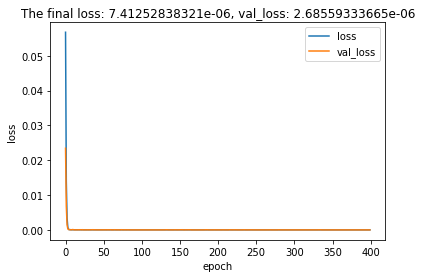

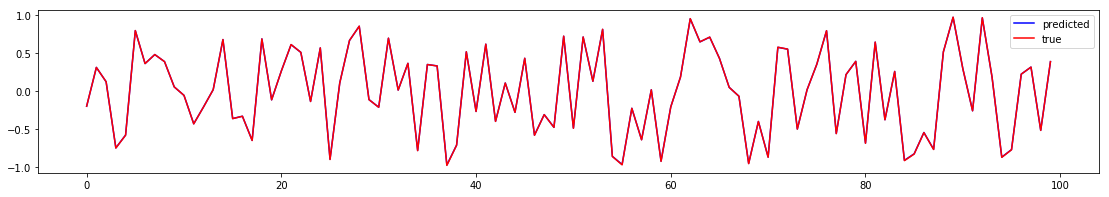

In [6]:

hist = model.fit(X_train, y_train, batch_size=60, epochs=400, 
                 verbose=1,validation_split=0.05)
for label in ["loss","val_loss"]:
    plt.plot(hist.history[label],label=label)

plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("The final loss: {}, val_loss: {}".format(hist.history["loss"][-1],hist.history["val_loss"][-1]))
plt.legend()
plt.show()
y_pred = model.predict(X_test)
plt.figure(figsize=(19,3))
# print(y_test[:2])
# print(y_pred[:2])
plt.plot(y_pred[:100],'b-',label="predicted")
plt.plot(y_test[:100], 'r-', label="true")
plt.legend()
plt.show()

In [7]:
from keras.models import load_model
model.save('sin_tri_model.h5')

(10, 2)


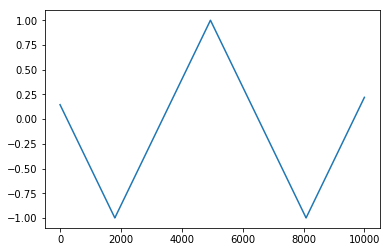

In [13]:
# padded test data
with open('../triangle_tests.pkl','rb') as fp:
    sin = np.array(pickle.load(fp))
    print sin.shape
#     print(sin[:,0])
    seq=[]
    for i in range(len(sin)):
        seq.append(sin[i][0])
    
    sinee = pad_sequences(seq,maxlen=10,dtype='float32')
    for i in range(len(sin)):
        sin[i][0] = sinee[i]
# print sin[0][0], sin[0][1][0]
plt.plot(sin[0][1])

9991/9991 [==============================] - 0s 17us/step
((9991, 10, 1), (9991, 1))


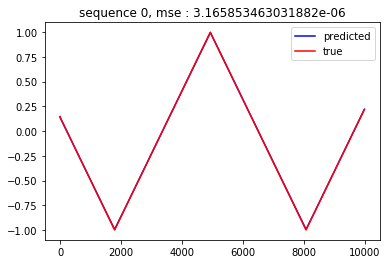

9991/9991 [==============================] - 0s 18us/step
((9991, 10, 1), (9991, 1))


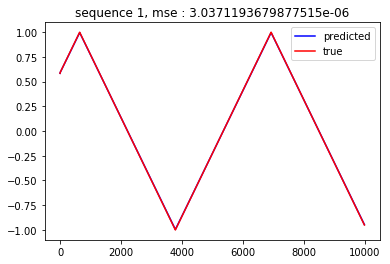

9991/9991 [==============================] - 0s 18us/step
((9991, 10, 1), (9991, 1))


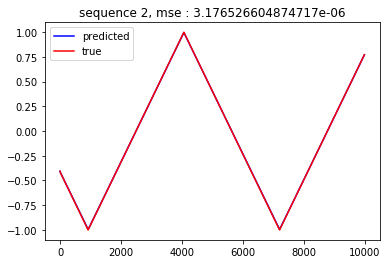

9991/9991 [==============================] - 0s 17us/step
((9991, 10, 1), (9991, 1))


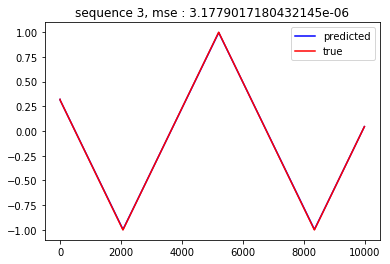

9991/9991 [==============================] - 0s 21us/step
((9991, 10, 1), (9991, 1))


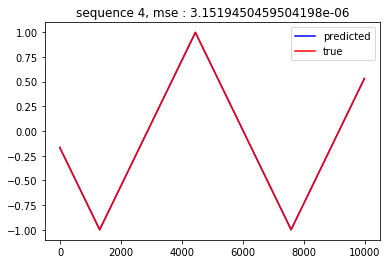

9991/9991 [==============================] - 0s 17us/step
((9991, 10, 1), (9991, 1))


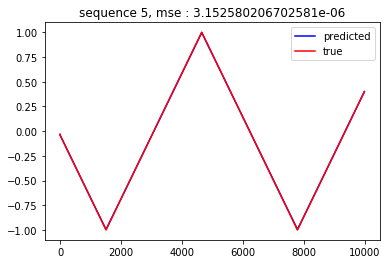

9991/9991 [==============================] - 0s 18us/step
((9991, 10, 1), (9991, 1))


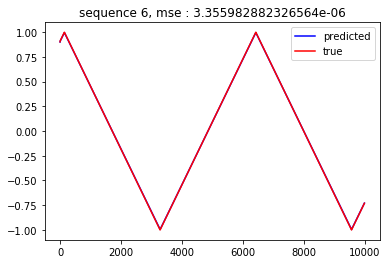

9991/9991 [==============================] - 0s 18us/step
((9991, 10, 1), (9991, 1))


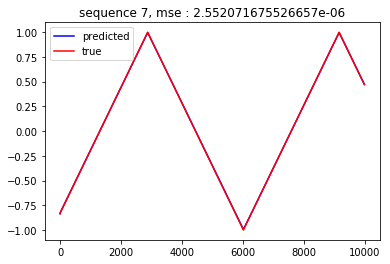

9991/9991 [==============================] - 0s 17us/step
((9991, 10, 1), (9991, 1))


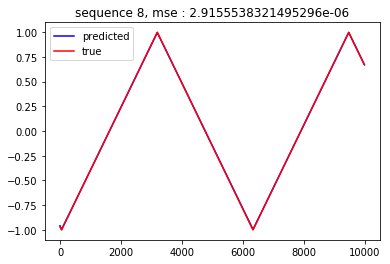

9991/9991 [==============================] - 0s 17us/step
((9991, 10, 1), (9991, 1))


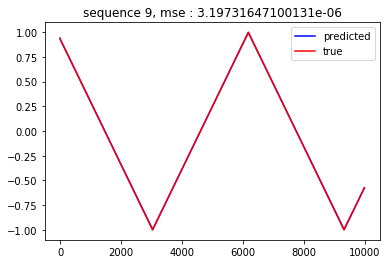

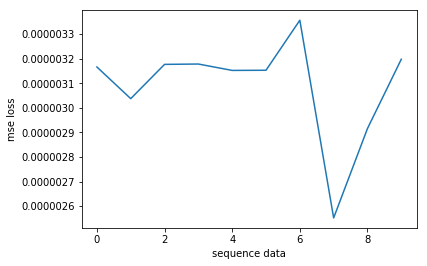

In [15]:
# Creating test data
# l = np.random.randint(len(sin))
# print l
mse=[]
for l in range(len(sin)):
    sin_test=[]
    sin_label=[]
    sin_test.append(sin[l][0])
    sin_label.append(sin[l][1][0])
    i=0
    seq_len = len(sin[l][0])
    while(i<len(sin[l][1])-MAX_SEQ_LEN):
    #     seq_len = np.random.randint(MAX_SEQ_LEN-5,MAX_SEQ_LEN+1)
    #     seq_len = 50
    #     print(i, seq_len)
        sin_test.append(sin[l][1][i:i+seq_len])
        sin_label.append(sin[l][1][i+seq_len])
        i+=1

    # plt.plot(sin[l][1])
    padXs = pad_sequences(sin_test, maxlen=MAX_SEQ_LEN,dtype='float32')
    sin_test = np.array(padXs)
    sin_test = np.expand_dims(sin_test, axis=2)
    sin_label = np.array(sin_label)
    sin_label = np.expand_dims(sin_label, axis=1)
    
    y_pred = model.predict(sin_test)
    z= model.evaluate(sin_test,sin_label)
    mse.append(z)
    plt.plot(y_pred[:],'b-',label="predicted")
    plt.plot(sin_label[:], 'r-', label="true")
    plt.legend()
    
    plt.title("sequence "+str(l)+", mse : "+str(model.evaluate(sin_test, sin_label)))
    print(sin_test.shape, sin_label.shape)
    plt.savefig("../SinTri_model_tri_input/sequence_"+str(l)+"_sin.png")
    plt.show()
plt.plot(mse)
plt.xlabel("sequence data")
plt.ylabel("mse loss")
plt.savefig('../SinTri_model_tri_input/mse_loss_sin.png')
plt.show()

(10, 2)


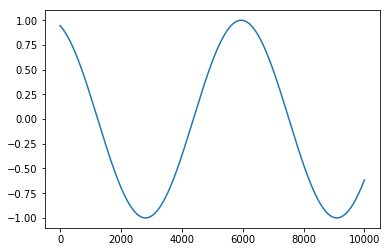

In [16]:
# padded test data
with open('../sine_tests.pkl','rb') as fp:
    sin = np.array(pickle.load(fp))
    print sin.shape
#     print(sin[:,0])
    seq=[]
    for i in range(len(sin)):
        seq.append(sin[i][0])
    
    sinee = pad_sequences(seq,maxlen=10,dtype='float32')
    for i in range(len(sin)):
        sin[i][0] = sinee[i]
# print sin[0][0], sin[0][1][0]
plt.plot(sin[0][1])

9991/9991 [==============================] - 0s 16us/step
((9991, 10, 1), (9991, 1))


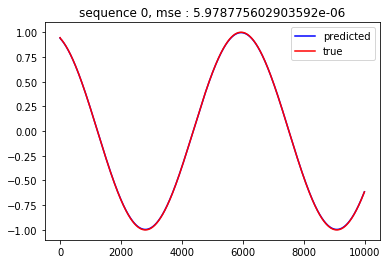

9991/9991 [==============================] - 0s 19us/step
((9991, 10, 1), (9991, 1))


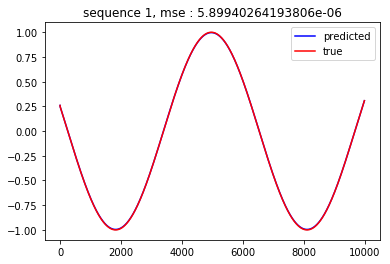

9991/9991 [==============================] - 0s 17us/step
((9991, 10, 1), (9991, 1))


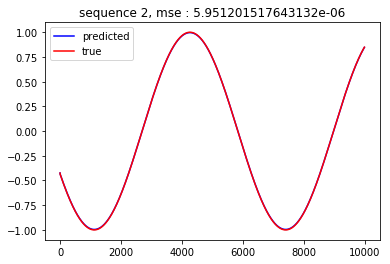

9991/9991 [==============================] - 0s 17us/step
((9991, 10, 1), (9991, 1))


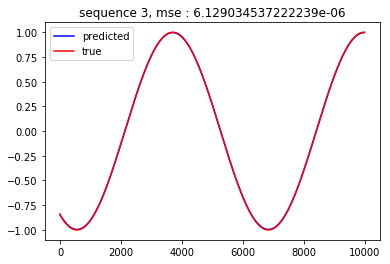

9991/9991 [==============================] - 0s 17us/step
((9991, 10, 1), (9991, 1))


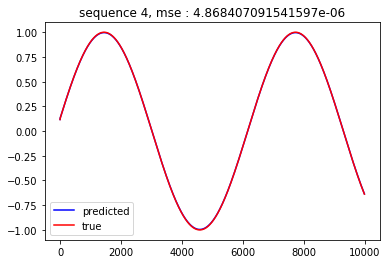

9991/9991 [==============================] - 0s 23us/step
((9991, 10, 1), (9991, 1))


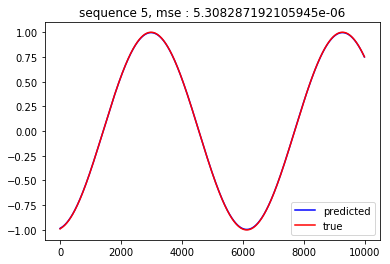

9991/9991 [==============================] - 0s 16us/step
((9991, 10, 1), (9991, 1))


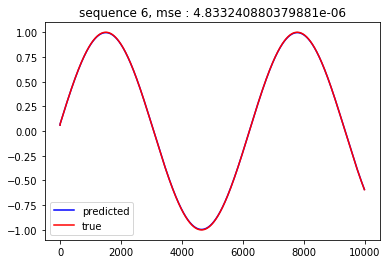

9991/9991 [==============================] - 0s 17us/step
((9991, 10, 1), (9991, 1))


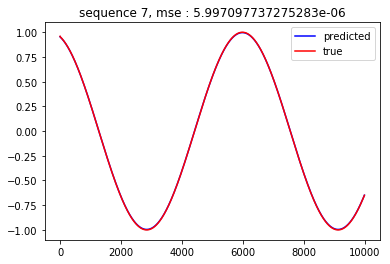

9991/9991 [==============================] - 0s 17us/step
((9991, 10, 1), (9991, 1))


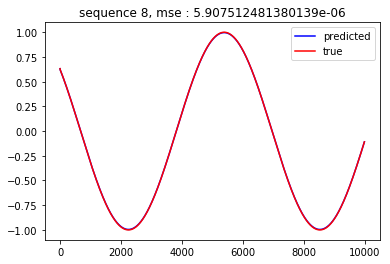

9991/9991 [==============================] - 0s 20us/step
((9991, 10, 1), (9991, 1))


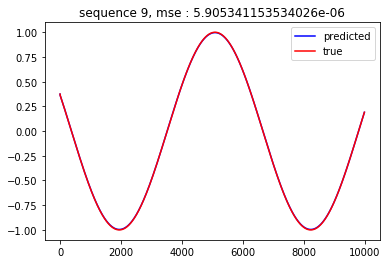

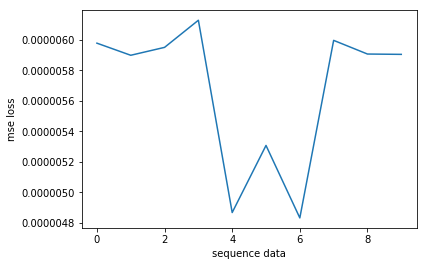

In [17]:
# Creating test data
# l = np.random.randint(len(sin))
# print l
mse=[]
for l in range(len(sin)):
    sin_test=[]
    sin_label=[]
    sin_test.append(sin[l][0])
    sin_label.append(sin[l][1][0])
    i=0
    seq_len = len(sin[l][0])
    while(i<len(sin[l][1])-MAX_SEQ_LEN):
    #     seq_len = np.random.randint(MAX_SEQ_LEN-5,MAX_SEQ_LEN+1)
    #     seq_len = 50
    #     print(i, seq_len)
        sin_test.append(sin[l][1][i:i+seq_len])
        sin_label.append(sin[l][1][i+seq_len])
        i+=1

    # plt.plot(sin[l][1])
    padXs = pad_sequences(sin_test, maxlen=MAX_SEQ_LEN,dtype='float32')
    sin_test = np.array(padXs)
    sin_test = np.expand_dims(sin_test, axis=2)
    sin_label = np.array(sin_label)
    sin_label = np.expand_dims(sin_label, axis=1)
    
    y_pred = model.predict(sin_test)
    z= model.evaluate(sin_test,sin_label)
    mse.append(z)
    plt.plot(y_pred[:],'b-',label="predicted")
    plt.plot(sin_label[:], 'r-', label="true")
    plt.legend()
    
    plt.title("sequence "+str(l)+", mse : "+str(model.evaluate(sin_test, sin_label)))
    print(sin_test.shape, sin_label.shape)
    plt.savefig("../SinTri_model_sin_input/sequence_"+str(l)+"_sin.png")
    plt.show()
plt.plot(mse)
plt.xlabel("sequence data")
plt.ylabel("mse loss")
plt.savefig('../SinTri_model_sin_input/mse_loss_sin.png')
plt.show()